# Monte Carlo simulation

In [4]:
import numpy as np
import matplotlib.pylab as plt

## Pi estimation

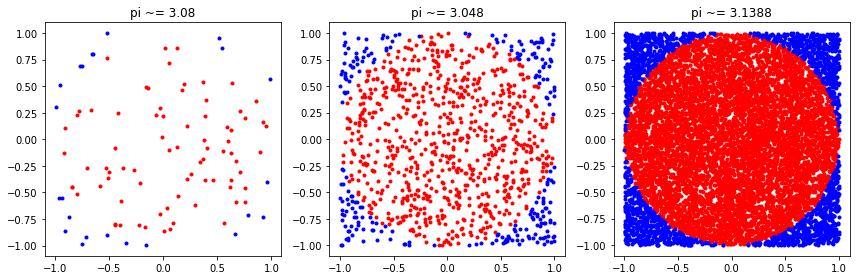

In [75]:
R = 1
N = (100, 1000, 10000)

plt.figure(figsize=(12, 4))

for idx, n in enumerate(N):
    xyr = np.random.uniform(-R, R, (2, n))
    inside = (xyr[0]**2 + xyr[1]**2) <= R**2
    outside = ~inside
    pi = 4 * inside.sum() / n
    plt.subplot(1, 3, idx + 1)
    plt.plot(xyr[0, inside], xyr[1, inside], ".r")
    plt.plot(xyr[0, outside], xyr[1, outside], ".b")
    plt.title("pi ~= {}".format(pi))

plt.tight_layout()
plt.show()

## Many simualations

In [158]:
def estimate_pi(n=1000):
    xyr = np.random.uniform(-1, 1, (2, n))
    inside = (xyr[0]**2 + xyr[1]**2) <= 1**2
    return 4 * inside.sum() / n

pies = [np.array([estimate_pi() for _ in range(1000)]) for _ in range(5)]

cumulative_mean = [[data[:idx].mean() for idx in range(1,len(data))] for data in pies]

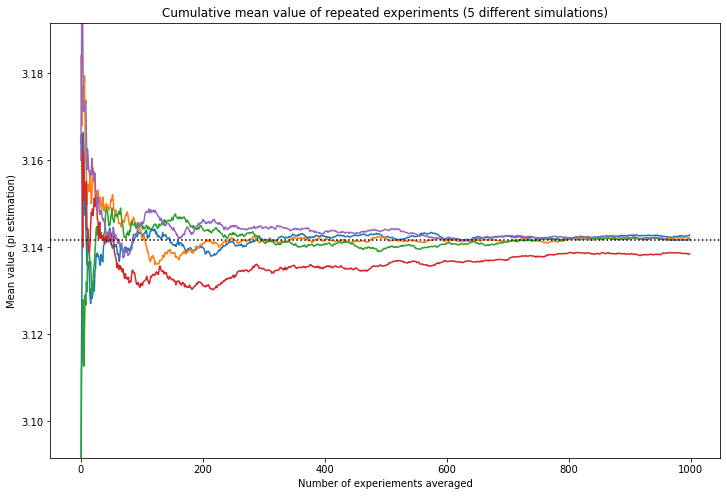

In [165]:
plt.figure(figsize=(12, 8))
for values in cumulative_mean:
    plt.plot(values)
    
plt.ylim(np.pi - 0.05, np.pi + 0.05)
plt.axhline(y=np.pi, color='k', linestyle=':')
plt.title("Cumulative mean value of repeated experiments (5 different simulations)")
plt.ylabel("Mean value (pi estimation)")
plt.xlabel("Number of experiements averaged")
plt.show()